# Apple(AAPL)

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

stock = yf.download("AAPL", start="2018-01-01", end="2025-03-01")

stock.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.479836,40.489237,39.774858,39.986353,102223600
2018-01-03,40.472786,41.017971,40.409341,40.543284,118071600
2018-01-04,40.660767,40.764164,40.437524,40.545619,89738400
2018-01-05,41.123711,41.210657,40.665476,40.757123,94640000
2018-01-08,40.970978,41.267067,40.872278,40.970978,82271200


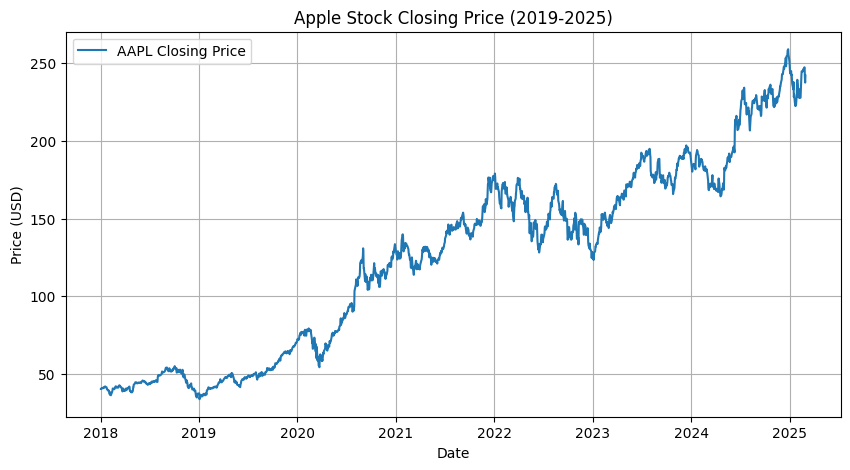

In [ ]:
# Plot the closing price
plt.figure(figsize=(10,5))
plt.plot(stock['Close'], label='AAPL Closing Price')
plt.title('Apple Stock Closing Price (2018-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = stock[['Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

time_steps = 60

x_data = []
y_data = []

for i in range(time_steps, len(scaled_data)):
    x_data.append(scaled_data[i-time_steps:i, 0])
    y_data.append(scaled_data[i, 0])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0473
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 8.7712e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 5.5238e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 4.9300e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.2532e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 5.3540e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.0447e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 4.7985e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 4.9043e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 4.5295e-04


In [ ]:
def predict_future(model, data, time_steps, future_days):
    # Get the last `time_steps` days of data to start the prediction
    last_data = data[-time_steps:]

    future_prices = []

    # Predict future stock prices day by day
    for _ in range(future_days):
        last_data_reshaped = np.reshape(last_data, (1, time_steps, 1))

        predicted_price = model.predict(last_data_reshaped)

        future_prices.append(predicted_price[0][0])

        predicted_price_reshaped = np.reshape(predicted_price, (1, 1))
        last_data = np.append(last_data[1:], predicted_price_reshaped, axis=0)

    future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))

    return future_prices


future_prices = predict_future(model, scaled_data, time_steps, 30)

# Print future stock prices (April 2025)
future_dates = pd.date_range(stock.index[-1], periods=31, freq='D')[1:]

future_df = pd.DataFrame(data=future_prices, index=future_dates, columns=["Predicted Price"])

# Display stock prices
print(future_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━

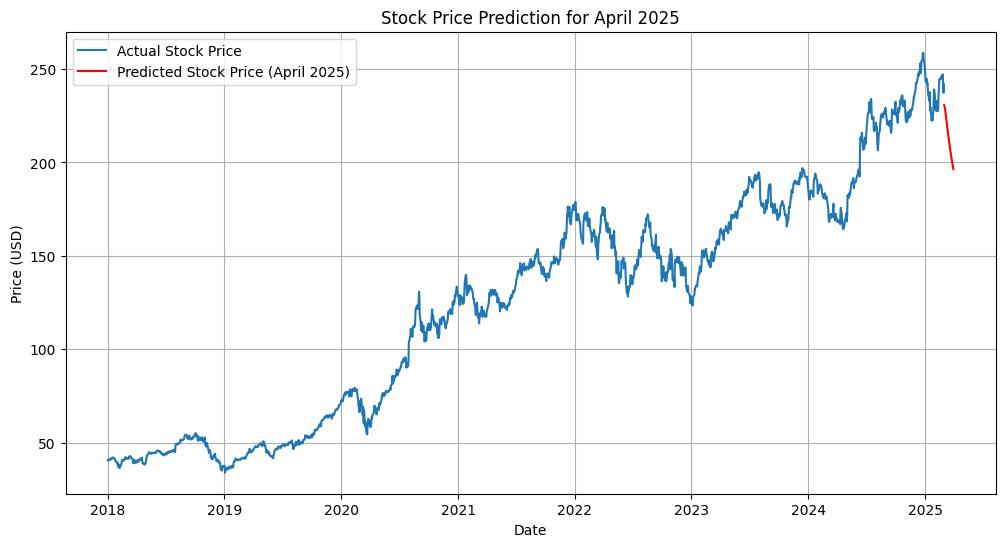

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(stock['Close'], label='Actual Stock Price')
plt.plot(future_df.index, future_df['Predicted Price'], label='Predicted Stock Price (April 2025)', color='red')
plt.title('Stock Price Prediction for April 2025')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


## Deep Learning Comparsion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

ticker = "AAPL"
data = yf.download(ticker, start="2010-01-01", end="2025-03-01")
prices = data["Close"].values.reshape(-1, 1)


[*********************100%***********************]  1 of 1 completed


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(prices_scaled, seq_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.0135 - val_loss: 7.7305e-04
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 1.0469e-04 - val_loss: 0.0011
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 9.5591e-05 - val_loss: 0.0012
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 9.2407e-05 - val_loss: 8.4505e-04
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 9.3359e-05 - val_loss: 8.1378e-04
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 1.0324e-04 - val_loss: 9.0165e-04
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 9.1568e-05 - val_loss: 6.1272e-04
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 8.9398e-05 - val_loss: 8.6912e-04
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 9.3877e-05 - val_loss: 6.2668e-04
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 9.9899e-05 - val_loss: 5.4949e-04


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━

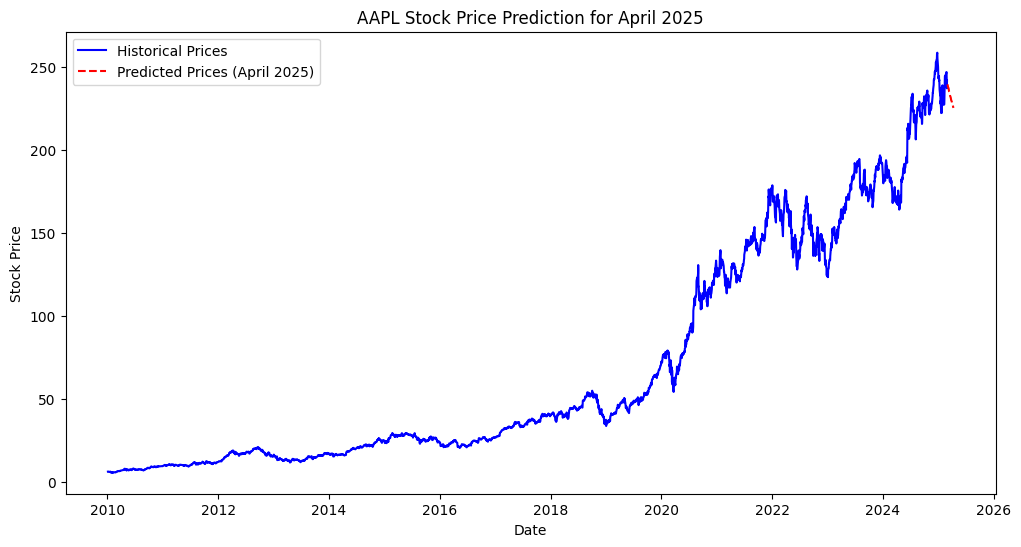

In [ ]:
# Predict future stock prices (April 2025)
future_days = 30
last_sequence = prices_scaled[-seq_length:]
predicted_prices = []

for _ in range(future_days):
    next_price = model.predict(last_sequence.reshape(1, seq_length, 1))
    predicted_prices.append(next_price[0, 0])
    last_sequence = np.append(last_sequence[1:], next_price).reshape(seq_length, 1)

predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='B')

plt.figure(figsize=(12, 6))
plt.plot(data.index, prices, label="Historical Prices", color='blue')
plt.plot(future_dates, predicted_prices, label="Predicted Prices (April 2025)", color='red', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{ticker} Stock Price Prediction for April 2025")
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error
import math

y_pred_scaled = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform(y_test.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Root Mean Squared Error (RMSE): 5.929615957574192
